In [1]:
import pandas as pd

df_scorers = pd.read_excel("dataset.xlsx", sheet_name="scorers")

df_results = pd.read_excel("dataset.xlsx", sheet_name="results")
df_results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
47394,2024-07-10 00:00:00,Netherlands,England,1,2,UEFA Euro,Dortmund,Germany,True
47395,2024-07-10 00:00:00,Uruguay,Colombia,0,1,Copa AmÃ©rica,Charlotte,United States,True
47396,2024-07-13 00:00:00,Canada,Uruguay,2,2,Copa AmÃ©rica,Charlotte,United States,True
47397,2024-07-14 00:00:00,Spain,England,2,1,UEFA Euro,Berlin,Germany,True


In [2]:
df_scorers

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,JosÃ© Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino GradÃ­n,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino GradÃ­n,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,JosÃ© Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False
...,...,...,...,...,...,...,...,...
44357,2024-07-13,Canada,Uruguay,Uruguay,Luis SuÃ¡rez,90.0,False,False
44358,2024-07-14,Argentina,Colombia,Argentina,Lautaro MartÃ­nez,112.0,False,False
44359,2024-07-14,Spain,England,Spain,Nico Williams,47.0,False,False
44360,2024-07-14,Spain,England,England,Cole Palmer,73.0,False,False


In [23]:
# Round the minute column

df_scorers["minute"] = df_scorers["minute"].fillna(0)
df_scorers["minute"] = df_scorers["minute"].apply(lambda x: round(x))

df_scorers

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,JosÃ© Piendibene,44,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino GradÃ­n,55,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino GradÃ­n,70,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,JosÃ© Piendibene,75,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2,False,False
...,...,...,...,...,...,...,...,...
44357,2024-07-13,Canada,Uruguay,Uruguay,Luis SuÃ¡rez,90,False,False
44358,2024-07-14,Argentina,Colombia,Argentina,Lautaro MartÃ­nez,112,False,False
44359,2024-07-14,Spain,England,Spain,Nico Williams,47,False,False
44360,2024-07-14,Spain,England,England,Cole Palmer,73,False,False


In [3]:
# remove accents from tournament names

df_results["tournament"] = df_results["tournament"].str.replace("Ã©", "e")

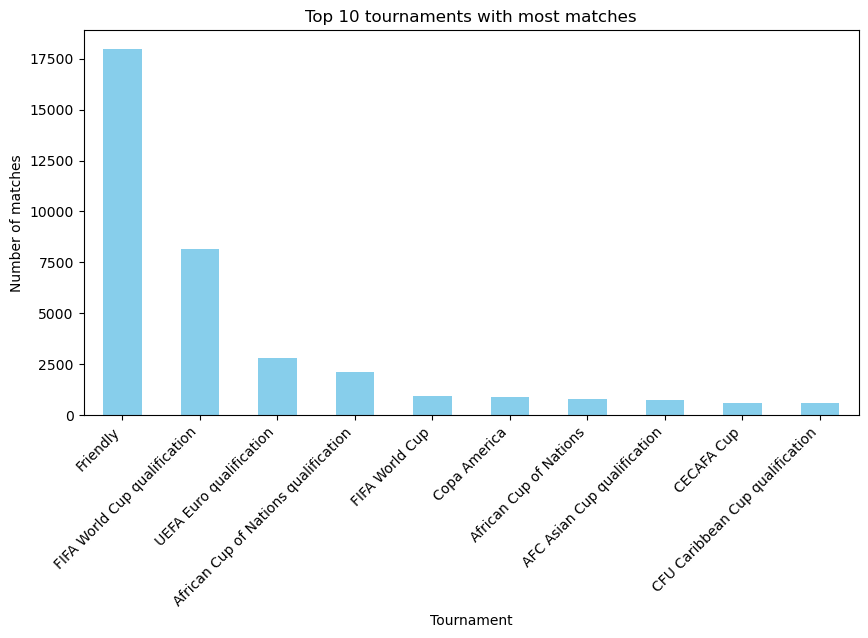

In [4]:
import matplotlib.pyplot as plt

count_matches = df_results["tournament"].value_counts().sort_values(ascending=False).head(10)

count_matches.plot(kind="bar", figsize=(10, 5), color="skyblue")

plt.title("Top 10 tournaments with most matches")
plt.ylabel("Number of matches")
plt.xlabel("Tournament")
plt.xticks(rotation=45, ha="right")
plt.show()

In [5]:
goals_local = df_results.groupby("home_team")["home_score"].sum()
goals_away = df_results.groupby("home_team")["away_score"].sum()

total_goals = goals_local.add(goals_away, fill_value=0).sort_values(ascending=False).head(10)
total_goals

home_team
Brazil         1973
Germany        1900
Argentina      1818
Sweden         1791
England        1700
Hungary        1698
Mexico         1692
France         1633
Netherlands    1556
South Korea    1513
dtype: int64

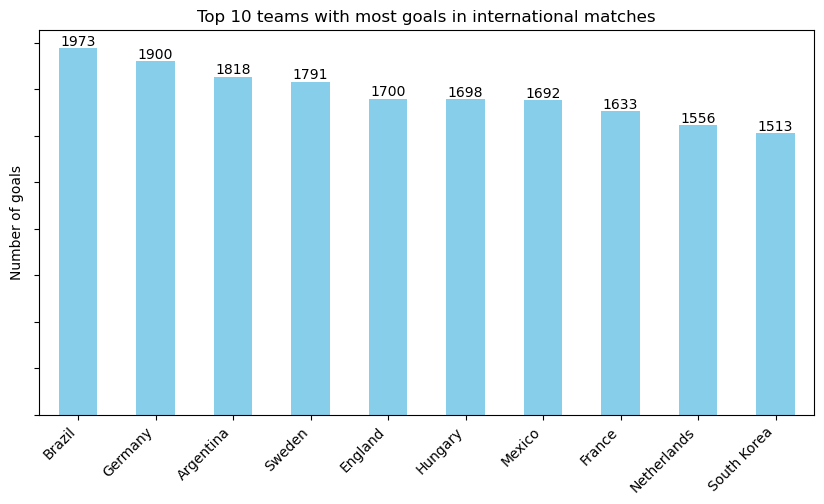

In [6]:
# Plot top 10 teams with most goals

total_goals.plot(kind="bar", figsize=(10, 5), color="skyblue")

plt.title("Top 10 teams with most goals in international matches")
plt.ylabel("Number of goals")
plt.xlabel("")
plt.xticks(rotation=45, ha="right")
plt.gca().set_yticklabels([])

for i in range(len(total_goals)):
    plt.text(i, total_goals.iloc[i], total_goals.iloc[i], ha="center", va="bottom")

plt.show()


In [7]:
# Plot top 10 encounters between teams

encounters = df_results["home_team"] + " vs " + df_results["away_team"]

sorted_encounters = sorted(encounters.str.split(" vs ").apply(lambda x: tuple(sorted(x))).value_counts().items(), key=lambda x: x[1], reverse=True)

df_encounters = pd.DataFrame(sorted_encounters, columns=["Encounter", "Count"]).head(10)

df_encounters["Encounter"] = df_encounters["Encounter"].str.join(" vs ")
df_encounters

,Encounter,Count
0,Argentina vs Uruguay,182
1,Austria vs Hungary,137
2,Belgium vs Netherlands,128
3,Guernsey vs Jersey,119
4,England vs Scotland,118
5,Kenya vs Uganda,110
6,Argentina vs Brazil,109
7,Norway vs Sweden,109
8,Denmark vs Sweden,108
9,Scotland vs Wales,106


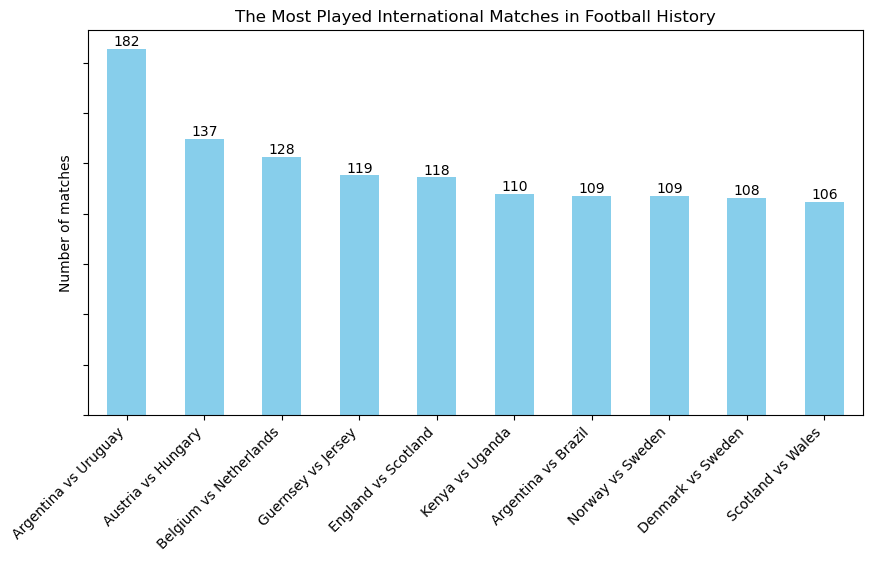

In [8]:
df_encounters.plot(kind="bar", x="Encounter", y="Count", figsize=(10, 5), color="skyblue")

plt.title("The Most Played International Matches in Football History")
plt.ylabel("Number of matches")
plt.gca().set_yticklabels([])
plt.xlabel("")
plt.xticks(rotation=45, ha="right")
plt.legend().remove()

for i in range(len(df_encounters)):
    plt.text(i, df_encounters["Count"].iloc[i], df_encounters["Count"].iloc[i], ha="center", va="bottom")

plt.show()

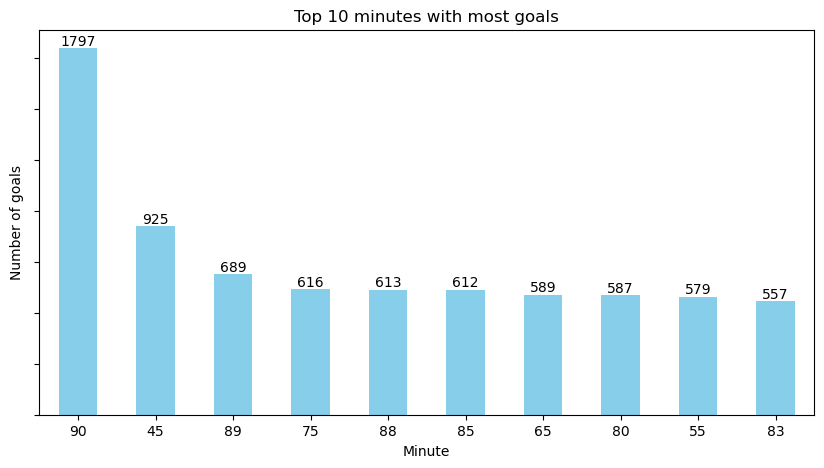

In [39]:
minute_goals = df_scorers.groupby("minute").size().sort_values(ascending=False).head(10)

minute_goals.plot(kind="bar", figsize=(10, 5), color="skyblue")

plt.title("Top 10 minutes with most goals")
plt.ylabel("Number of goals")
plt.gca().set_yticklabels([])
plt.xlabel("Minute")
plt.xticks(rotation=0, ha="center")

for i in range(len(minute_goals)):
    plt.text(i, minute_goals.iloc[i], minute_goals.iloc[i], ha="center", va="bottom")

plt.show()

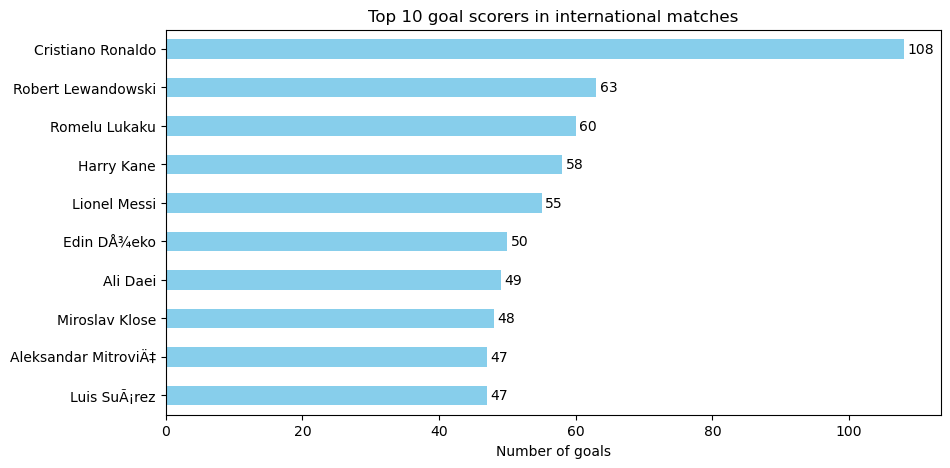

In [46]:
# Plot top 10 goal scorers

top_scorers = df_scorers["scorer"].value_counts().head(10)

top_scorers.plot(kind="barh", figsize=(10, 5), color="skyblue")

plt.title("Top 10 goal scorers in international matches")
plt.xlabel("Number of goals")
plt.ylabel("")
plt.gca().invert_yaxis()

for i in range(len(top_scorers)):
    plt.text(top_scorers.iloc[i] + 0.5, i, top_scorers.iloc[i], ha="left", va="center")

In [75]:
pd.to_datetime(df_scorers["date"])

0       1916-07-02
1       1916-07-02
2       1916-07-02
3       1916-07-02
4       1916-07-06
           ...    
44357   2024-07-13
44358   2024-07-14
44359   2024-07-14
44360   2024-07-14
44361   2024-07-14
Name: date, Length: 44362, dtype: datetime64[ns]

In [84]:
# Plot top 10 players with most goals in the season 23/24 (last season)
import datetime

start_season = datetime.date(2023,8,11)

start_season = pd.to_datetime(start_season)

df_scorers_last_season = df_scorers[df_scorers["date"] > start_season]

scorers_last_season = df_scorers_last_season["scorer"].value_counts().sort_values(ascending=False).head(10)
scorers_last_season


scorer
Akram Afif              8
Romelu Lukaku           8
Harry Kane              6
Cody Gakpo              6
Aymen Hussein           6
Kylian MbappÃ©          6
Aleksandar MitroviÄ‡    5
Ayase Ueda              5
Emilio Nsue             5
Lautaro MartÃ­nez       5
Name: count, dtype: int64

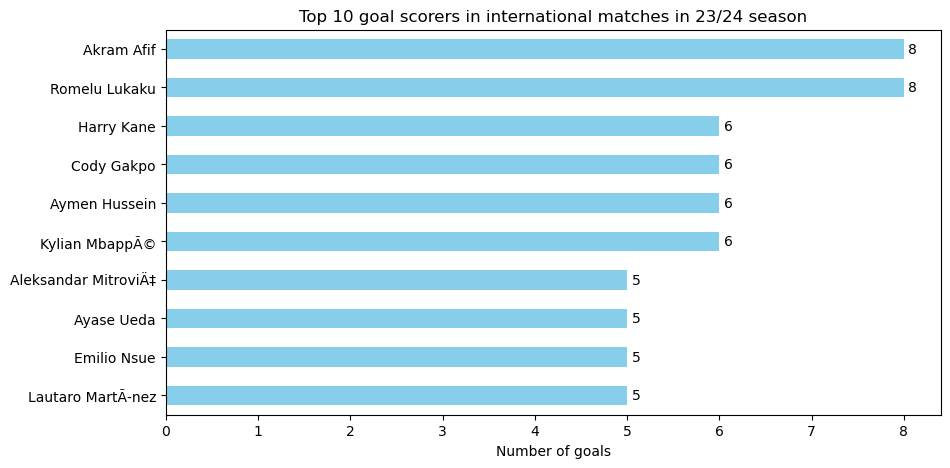

In [89]:
scorers_last_season.plot(kind="barh", figsize=(10, 5), color="skyblue")

plt.title("Top 10 goal scorers in international matches in 23/24 season")
plt.xlabel("Number of goals")
plt.ylabel("")
plt.gca().invert_yaxis()

for i in range(len(scorers_last_season)):
    plt.text(scorers_last_season.iloc[i] + 0.05, i, scorers_last_season.iloc[i], ha="left", va="center")